# Importing Data

In [147]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

files.upload()

In [148]:
train_data = pd.read_csv('tweet_emotions.csv')

# EDA and Preprocessing

In [115]:
train_data.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [116]:
train_data.drop('tweet_id', axis=1, inplace=True)

In [117]:
train_data.head(5)

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [7]:
train_data.shape

(40000, 2)

In [8]:
train_data['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [9]:
# How many classes?

len(train_data['sentiment'].unique())

13

In [10]:
# How many examples of each class?
train_data.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Text(0.5, 0, 'category')

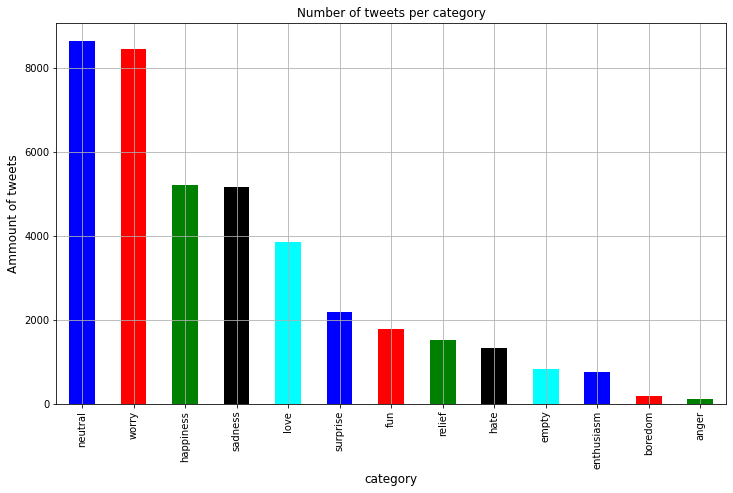

In [11]:
a = train_data.sentiment.value_counts()
colors = ['blue', 'red', 'green', 'black', 'cyan']

a.plot(x='Category', y='number_of_comments', kind='bar', legend=False, figsize=(12, 7), color=colors, grid=True)
plt.title("Number of tweets per category")
plt.ylabel('Ammount of tweets', fontsize=12)
plt.xlabel('category', fontsize=12)

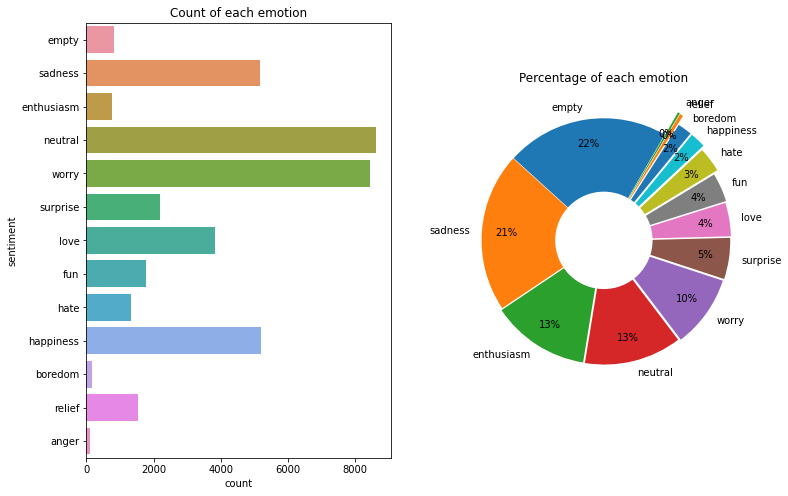

In [151]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(train_data["sentiment"].dropna().value_counts()))/sum(list(train_data["sentiment"].dropna().value_counts())))[::-1])[:]
labels = list(train_data["sentiment"].dropna().unique())[:]
sizes = train_data["sentiment"].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y="sentiment", data=train_data, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [12]:
train_data.dtypes

sentiment    object
content      object
dtype: object

In [13]:
c = train_data['sentiment'].astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'anger', 1: 'boredom', 2: 'empty', 3: 'enthusiasm', 4: 'fun', 5: 'happiness', 6: 'hate', 7: 'love', 8: 'neutral', 9: 'relief', 10: 'sadness', 11: 'surprise', 12: 'worry'}


In [14]:
d = pd.DataFrame(d, index=[0])
d = d.transpose()

d

,0
0,anger
1,boredom
2,empty
3,enthusiasm
4,fun
5,happiness
6,hate
7,love
8,neutral
9,relief


In [15]:
train_data['sentiment']= train_data['sentiment'].astype('category')
train_data['sentiment'] = train_data['sentiment'].cat.codes

train_data.head(5)

,sentiment,content
0,2,@tiffanylue i know i was listenin to bad habi...
1,10,Layin n bed with a headache ughhhh...waitin o...
2,10,Funeral ceremony...gloomy friday...
3,3,wants to hang out with friends SOON!
4,8,@dannycastillo We want to trade with someone w...


In [16]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_data)-5) # create random indexes not higher than the total number of samples
for row in train_data[["content", "sentiment"]][random_index:random_index+5].itertuples():
  _, tweet, sentiment = row
  if sentiment==12:
      a = "(worry)"
  elif sentiment==11:
      a = "(surprise)"
  elif sentiment==10:
      a = "(sad)"
  elif sentiment==9:
      a = "(relief)"
  elif sentiment==8:
      a = "(neutral)"
  elif sentiment==7:
      a = "(love)"
  elif sentiment==6:
      a = "(hate)"
  elif sentiment==5:
      a = "(happy)"
  elif sentiment==4:
      a = "(fun)"
  elif sentiment==3:
      a = "(enthusiasm)"
  elif sentiment==2:
      a = "(empty)"
  elif sentiment==1:
      a = "(boredom)"
  elif sentiment==0:
      a = "(angry)"
        
  print(f"Sentiment: {sentiment}", a)
  print(f"Text: {tweet}\n")
  print("---\n")

Sentiment: 8 (neutral)
Text: Getting used to this shoulder immobilizer thing. Even getting used to sleeping in the recliner.

---

Sentiment: 11 (surprise)
Text: @elliottyamin your new song is AMAZING

---

Sentiment: 7 (love)
Text: Feeling special @ looking4him first guy to give me flowers.

---

Sentiment: 8 (neutral)
Text: PeeWee is napping on the couch.  http://apps.facebook.com/dogbook/profile/view/5608012

---

Sentiment: 5 (happy)
Text: holy smokes! star trek was freaking awesomeeeee

---



In [17]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data["content"].to_numpy(),
                                                                            train_data["sentiment"].to_numpy(),
                                                                            test_size=0.2, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [18]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(32000, 32000, 8000, 8000)

In [19]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['Thundershowers plus baseball equals awwww',
        'The Hangover: That movie is gonna be hilarious. wish i could see it with the crew',
        'Playing some games before I leave for work   Work til at least 11PM tonight.',
        'About to be stick at work till freakin 2 am.  Madd suck and I worked most the day!',
        "@Sarah_x_ATL u mean jack barakat's?! wow so have u ever gone to his house? Hehe i mean ur ssoo lucky to have the address!",
        "Ordered a new computer! Unfortunately it won't get here until the end of June.",
        "@Maariiaan hahahah yeah, you're right! Plus I'm Twitteraddict so, You'll find me here all (well almost) day most likely",
        "Happy Birthday Snickers!!!! ? I hope you have the best day ever! Let's go shopping!!!",
        "M.I.A?PJ?Beasties?Thievery?Volta?Bat4Lashes?BandOfHorses? I enjoy this line-up: http://bit.ly/16lUgX Too bad it's in San Fran",
        'is happy  and clean, squeaky clean'], dtype=object),
 array([ 8,  4, 12,  6

# Text Vectorization

In [20]:
import tensorflow as tf

# Use the default TextVectorization variables
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                                    standardize="lower_and_strip_punctuation", # how to process text
                                                    split="whitespace", # how to split tokens
                                                    ngrams=None, # create groups of n-words?
                                                    output_mode="int", # how to map tokens to numbers
                                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [21]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

13

In [22]:
from tensorflow.keras.layers import TextVectorization

# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [23]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [24]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 393,    5,    1,   11,    6, 1361,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [25]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
cleaning time      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[657,  53,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [26]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'i', 'to', 'the']
Bottom 5 least common words: ['mob', 'moanasaves', 'moan', 'mnth', 'mneylon']


# Embedding Layer

In [27]:
tf.random.set_seed(42)
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=max_vocab_length, # set input shape
                      output_dim=128, # set size of embedding vector
                      embeddings_initializer="uniform", # default, intialize randomly
                      input_length=max_length, # how long is each input
                      name="embedding_1") 

embedding

In [28]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Goodmorning twitter bugs.. happy monday to you all! Today marks my first official day at my first fulltime job.. time to get ready!      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01990565, -0.04283296,  0.03480727, ..., -0.00259724,
         -0.03109459,  0.04915792],
        [ 0.02534569, -0.01725786, -0.00745319, ...,  0.02127732,
         -0.02547069, -0.03247217],
        [ 0.0488725 , -0.00097545,  0.04267197, ...,  0.03907653,
         -0.00334287,  0.0459348 ],
        ...,
        [-0.03959218,  0.01670352,  0.0441939 , ..., -0.00096967,
          0.01916101,  0.01184867],
        [ 0.03210879,  0.01650668,  0.01403118, ...,  0.01477012,
          0.03275109,  0.00308426],
        [-0.00724739, -0.04718477, -0.02565417, ..., -0.03481182,
          0.01107268, -0.03028326]]], dtype=float32)>

In [29]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

# Model 1: A simple dense model

In [30]:
class_names = train_data['sentiment'].unique()

class_names

array([ 2, 10,  3,  8, 12, 11,  7,  4,  6,  5,  1,  9,  0], dtype=int8)

In [31]:
len(class_names)

13

In [118]:
train_data.head(5)

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [119]:
y = pd.get_dummies(train_data.sentiment, prefix='sentiment_')

In [120]:
y.shape

(40000, 13)

In [121]:
y

,sentiment__anger,sentiment__boredom,sentiment__empty,sentiment__enthusiasm,sentiment__fun,sentiment__happiness,sentiment__hate,sentiment__love,sentiment__neutral,sentiment__relief,sentiment__sadness,sentiment__surprise,sentiment__worry
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,1,0,0,0,0
39996,0,0,0,0,0,0,0,1,0,0,0,0,0
39997,0,0,0,0,0,0,0,1,0,0,0,0,0
39998,0,0,0,0,0,1,0,0,0,0,0,0,0


In [122]:
x = train_data.pop('content')

In [123]:
x.shape

(40000,)

In [124]:
x

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [125]:
one_hot_data = pd.concat([x, y], axis=1, ignore_index=True)

In [126]:
one_hot_data.shape

(40000, 14)

In [127]:
one_hot_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,@tiffanylue i know i was listenin to bad habi...,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Layin n bed with a headache ughhhh...waitin o...,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Funeral ceremony...gloomy friday...,0,0,0,0,0,0,0,0,0,0,1,0,0
3,wants to hang out with friends SOON!,0,0,0,1,0,0,0,0,0,0,0,0,0
4,@dannycastillo We want to trade with someone w...,0,0,0,0,0,0,0,0,1,0,0,0,0


In [128]:
for col_name in one_hot_data.columns:
    print(col_name)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [130]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(one_hot_data[0].to_numpy(),
                                                                            one_hot_data.iloc[:,1:].to_numpy(),
                                                                            test_size=0.2, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [135]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1), dtype="string") 
x = text_vectorizer(inputs) 
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x) 
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") 

In [136]:
# Compile
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
1000/1000 [==============================] - 5s 4ms/step - loss: 1.7487 - accuracy: 0.4378 - val_loss: 1.9443 - val_accuracy: 0.3386
Epoch 2/5
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3992 - accuracy: 0.5481 - val_loss: 2.0342 - val_accuracy: 0.3313
Epoch 3/5
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2781 - accuracy: 0.5809 - val_loss: 2.1293 - val_accuracy: 0.3265
Epoch 4/5
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2009 - accuracy: 0.6028 - val_loss: 2.2205 - val_accuracy: 0.3159
Epoch 5/5
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1420 - accuracy: 0.6202 - val_loss: 2.3057 - val_accuracy: 0.3109


# Model 6

In [137]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [138]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [145]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(len(class_names), activation="softmax")
], name="model_6_USE")

# Compile model
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dense_15 (Dense)            (None, 13)                845       
                                                                 
Total params: 256,831,501
Trainable params: 33,677
Non-trainable params: 256,797,824
_________________________________________________________________


In [146]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels))

Epoch 1/10
1000/1000 [==============================] - 13s 12ms/step - loss: 1.9468 - accuracy: 0.3457 - val_loss: 1.8560 - val_accuracy: 0.3650
Epoch 2/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.8241 - accuracy: 0.3741 - val_loss: 1.8406 - val_accuracy: 0.3638
Epoch 3/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.8004 - accuracy: 0.3799 - val_loss: 1.8373 - val_accuracy: 0.3705
Epoch 4/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.7860 - accuracy: 0.3835 - val_loss: 1.8352 - val_accuracy: 0.3735
Epoch 5/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.7736 - accuracy: 0.3877 - val_loss: 1.8359 - val_accuracy: 0.3731
Epoch 6/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.7625 - accuracy: 0.3907 - val_loss: 1.8453 - val_accuracy: 0.3715
Epoch 7/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.7518 - accuracy: 0.3944 - val_loss: 1.8416 -

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [165]:
ex1 = "I am sad and angry"

In [168]:
pipe_dt = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(random_state=100))])

In [170]:
pipe_dt.fit(train_sentences, train_labels)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', DecisionTreeClassifier(random_state=100))])

In [171]:
pipe_dt.score(val_sentences, val_labels)

0.24375